In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "1"


In [2]:
X, y_true = make_blobs(n_samples=500,centers=3,cluster_std=0.60,random_state=42)

In [3]:
df = pd.DataFrame(X, columns=['Feature_1','Feature_2'])

In [4]:
df

,Feature_1,Feature_2
0,-6.190063,-7.302015
1,3.021747,1.940593
2,5.953761,1.488191
3,-2.744463,8.136177
4,5.360607,1.728324
...,...,...
495,-6.040014,-6.325329
496,-2.555459,9.218977
497,4.438408,2.974583
498,-7.193261,-6.250704


In [5]:
standard = StandardScaler()
X_scaled = standard.fit_transform(df)

In [6]:
inertia = []
K_range = range(1,11)

In [7]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

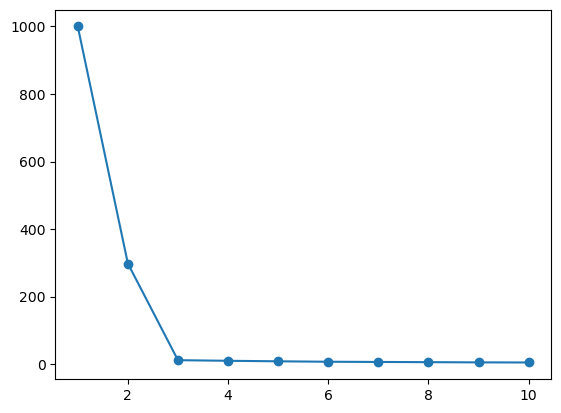

In [8]:
plt.plot(K_range,inertia,marker='o')

In [9]:
k_means_final = KMeans(n_clusters=3,random_state=42)

In [10]:
cluster_labels = k_means_final.fit_predict(X_scaled)

In [13]:
df['cluster'] = cluster_labels

<Axes: xlabel='Feature_1', ylabel='Feature_2'>

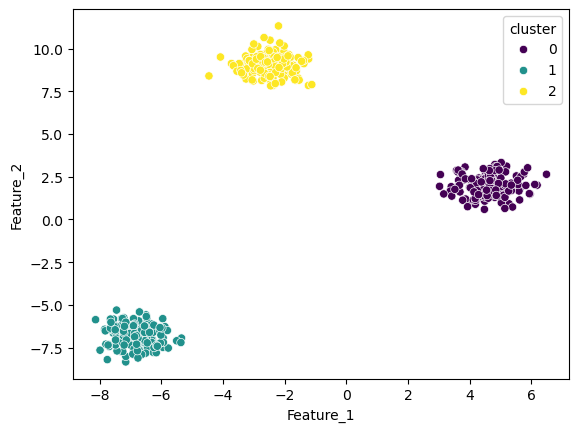

In [14]:
sns.scatterplot(x=df['Feature_1'],
                y=df['Feature_2'],
                hue=df['cluster'],
                palette='viridis')